In [61]:
print("Start")

Start


# Lab 2

* Use suitable library to generate a dummy structured and labelled dataset
* 5k+ records, as many features as we want
* Perform binary classification using Logistic Regression
* Try 2 way splitting
* Try 3 way splitting
* Try k folds validation

## Scikit-learn make_classification function:
We shall use scikit-learn's make_classification function to generate a dataset

In [62]:
from sklearn.datasets import make_classification

X, y = make_classification(
    random_state=5,     # random seed
    n_samples=6000,     # number of samples
    n_features=10,      # number of features
    n_informative=5,    # number of features which actually matter
    n_redundant=3,      # linear combinations of informative features
    n_classes=2         # binary classification
)

In [63]:
# load the generated dataset into a pd Dataframe

import pandas as pd

df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,2.689014,1.715000,-0.448506,-0.594459,1.847087,-0.466670,1.265219,0.431696,-0.156415,0.882908
1,-1.163846,0.284744,-0.379812,0.498750,-0.124593,0.548330,-0.885520,-1.279090,0.703724,0.585465
2,-1.018871,2.213766,-1.290091,4.304477,-3.022354,-0.578934,1.073697,1.345036,-3.880343,-1.848140
3,-0.308594,-1.112996,1.152337,1.338037,-2.768126,-1.012441,1.335199,1.171958,-1.552735,-0.585500
4,0.688695,3.151894,-0.401217,-1.822965,1.828636,2.853044,1.012197,1.191879,0.879646,0.409769


In [64]:
df['target'] = y
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,2.689014,1.715000,-0.448506,-0.594459,1.847087,-0.466670,1.265219,0.431696,-0.156415,0.882908,0
1,-1.163846,0.284744,-0.379812,0.498750,-0.124593,0.548330,-0.885520,-1.279090,0.703724,0.585465,0
2,-1.018871,2.213766,-1.290091,4.304477,-3.022354,-0.578934,1.073697,1.345036,-3.880343,-1.848140,1
3,-0.308594,-1.112996,1.152337,1.338037,-2.768126,-1.012441,1.335199,1.171958,-1.552735,-0.585500,1
4,0.688695,3.151894,-0.401217,-1.822965,1.828636,2.853044,1.012197,1.191879,0.879646,0.409769,0


## Data Cleaning

           feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
feature_0   1.000000   0.099494   0.005568  -0.204853   0.300064  -0.443940   
feature_1   0.099494   1.000000  -0.004997   0.469594   0.011517   0.026930   
feature_2   0.005568  -0.004997   1.000000  -0.006382  -0.006418   0.002098   
feature_3  -0.204853   0.469594  -0.006382   1.000000  -0.678149  -0.621244   
feature_4   0.300064   0.011517  -0.006418  -0.678149   1.000000   0.418211   
feature_5  -0.443940   0.026930   0.002098  -0.621244   0.418211   1.000000   
feature_6   0.813435   0.164618   0.013725  -0.133790  -0.111185  -0.270922   
feature_7  -0.213024   0.257901   0.017821   0.177231  -0.336877   0.187051   
feature_8   0.236531  -0.476319  -0.001217  -0.912886   0.646548   0.489472   
feature_9   0.009971   0.012893   0.012232   0.012944  -0.003392  -0.013647   
target     -0.110867  -0.018805   0.010388   0.627183  -0.654105  -0.561089   

           feature_6  feature_7  feature_8  feature

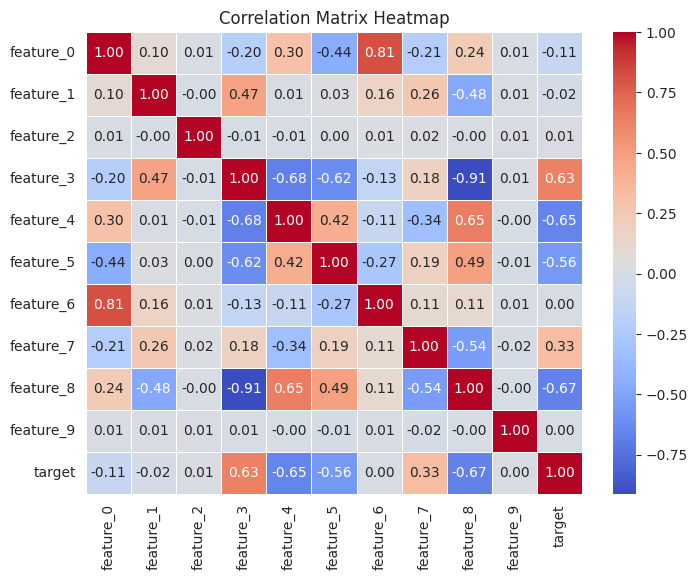

In [65]:
# check for correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

# calculating correlation matrix
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)  # View correlation values

# Set the background style to white
sns.set_style('white')
sns.palette='viridis'

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

We observe that high correlation exists between the following features:
* `feature_0` and `feature_6`
* `feature_3` and `feature_8`
Hence we shall drop feature_6 and feature_8 from the dataset

In [66]:
df.drop(
    labels=['feature_6', 'feature_8'],
    axis=1,
    inplace=True
)

df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_9,target
0,2.689014,1.715000,-0.448506,-0.594459,1.847087,-0.466670,0.431696,0.882908,0
1,-1.163846,0.284744,-0.379812,0.498750,-0.124593,0.548330,-1.279090,0.585465,0
2,-1.018871,2.213766,-1.290091,4.304477,-3.022354,-0.578934,1.345036,-1.848140,1
3,-0.308594,-1.112996,1.152337,1.338037,-2.768126,-1.012441,1.171958,-0.585500,1
4,0.688695,3.151894,-0.401217,-1.822965,1.828636,2.853044,1.191879,0.409769,0


## Data analysis

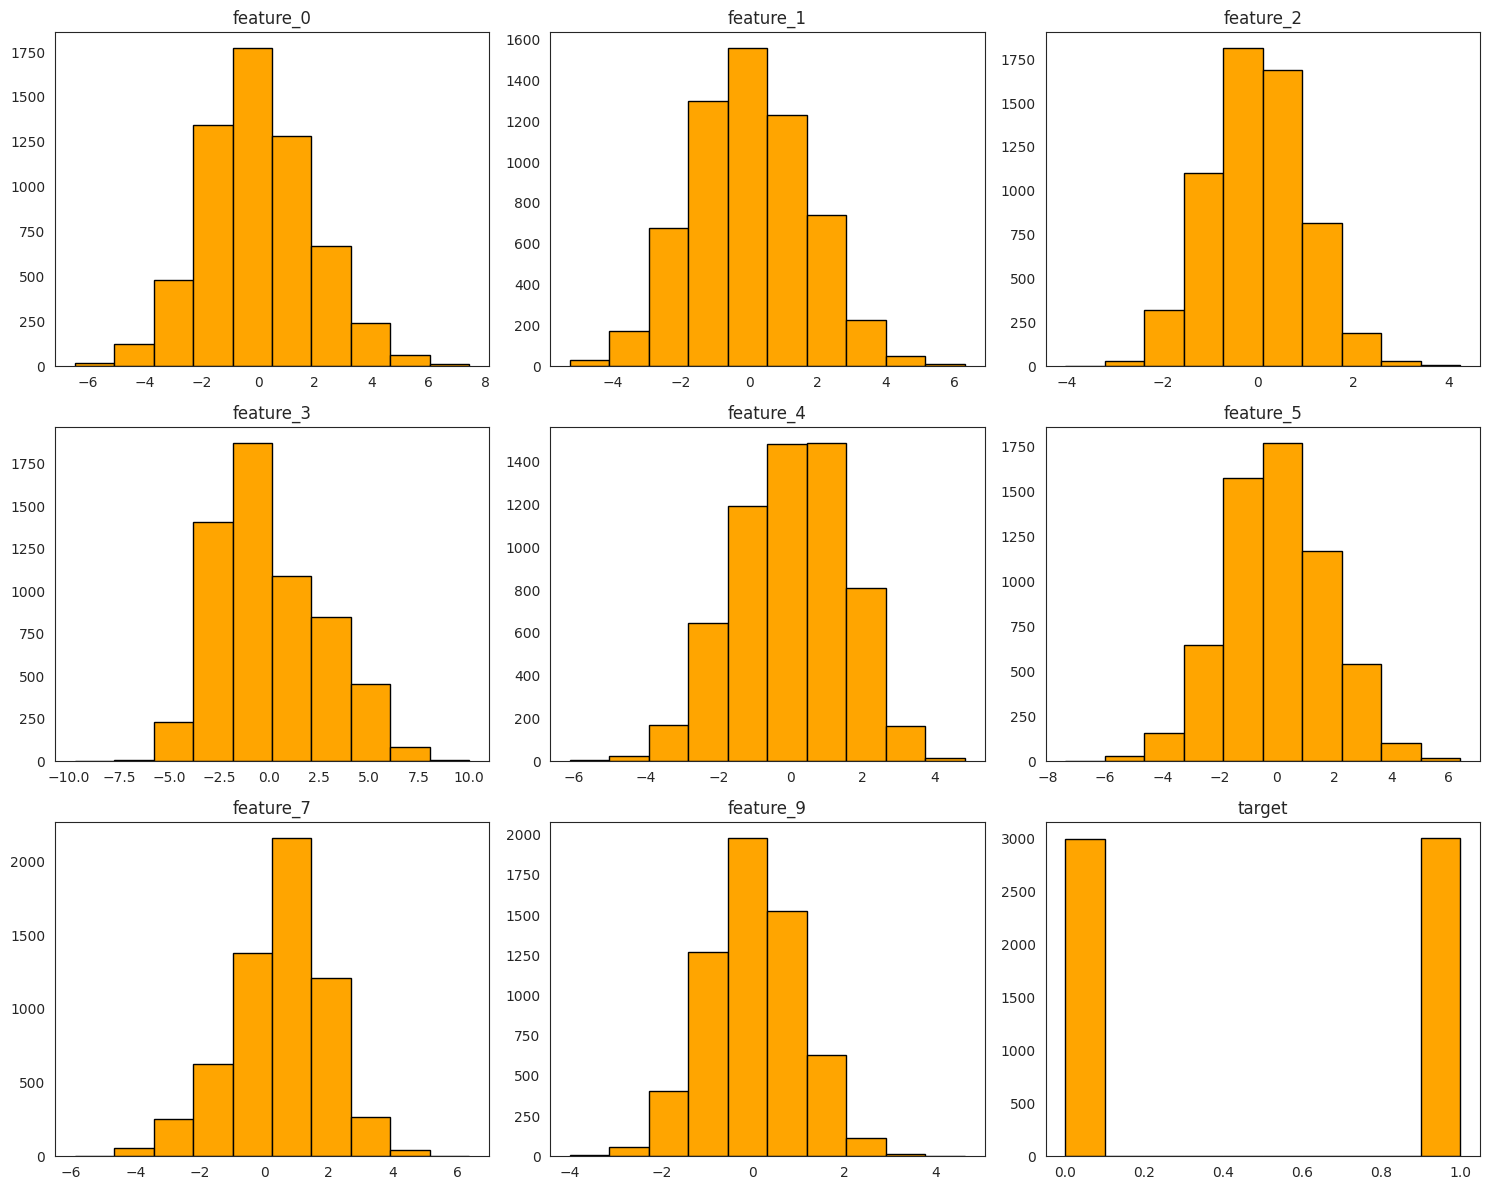

In [67]:
# histogram of all numberical values

# for cat in df.columns:
#     plt.hist(df[cat], color='orange', edgecolor='black', )
#     plt.title(cat)
#     plt.show()

# number of columns per row
ncols = 3
nrows = -(-len(df.columns) // ncols)  # ceiling division

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
axes = axes.flatten()  # make it 1D for easy indexing

for i, cat in enumerate(df.columns):
    axes[i].hist(df[cat], color='orange', edgecolor='black')
    axes[i].set_title(cat)

# hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


We observe that all the features are (almost) normally distributed. Hence, there is no need to process them further.

## Trying 2-way split

In [68]:
class_0, class_1 = 0, 0
for i in range(len(df)):
    if df['target'][i] == 0:
        class_0 += 1
    else:
        class_1 += 1

print(f"Class 0 population = {class_0}, fraction = {class_0 / (class_0 + class_1):.2f}")
print(f"Class 1 population = {class_1}, fraction = {class_1 / (class_0 + class_1):.2f}")

Class 0 population = 2996, fraction = 0.50
Class 1 population = 3004, fraction = 0.50


We observe that the dataset is equally balanced

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=5,
    shuffle=True
)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       741
           1       0.92      0.92      0.92       759

    accuracy                           0.91      1500
   macro avg       0.91      0.91      0.91      1500
weighted avg       0.91      0.91      0.91      1500



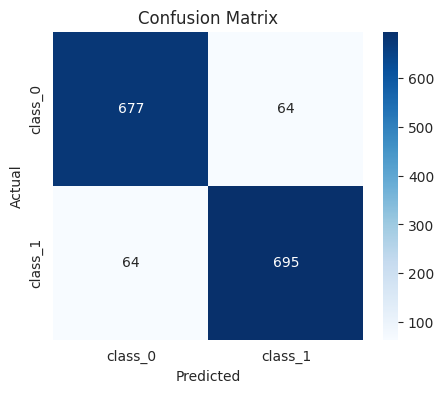

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap="Blues",
    xticklabels=['class_0', 'class_1'],
    yticklabels=['class_0', 'class_1'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Trying 3 way splitting

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=4,
    shuffle=True
)
# train size = 0.8,
# test size = 0.2

X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    train_size=0.75,
    random_state=5,
    shuffle=True
)
# final train size = 0.8 * 0.75 = 0.6
# final validation size = 0.8 * 0.25 = 0.2
# final test size = 0.2 (retained from before)

print(f"Training dataset size: {len(X_train)}")
print(f"Testing dataset size: {len(X_test)}")
print(f"Validation dataset size: {len(X_val)}")

Training dataset size: 3600
Testing dataset size: 1200
Validation dataset size: 1200


In [77]:
# Hyper parameter tuning

params = {
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'solver': ['sag', 'saga', 'newton-cholesky'],
    'max_iter': [100, 500, 750, 900, 1000],
}
n_jobs = 4

best_score = 0
best_params = None

for p in params['penalty']:
    for s in params['solver']:
        for m in params['max_iter']:

            # train
            try:
                model = LogisticRegression(
                    penalty=p,
                    solver=s,
                    max_iter=m,
                    n_jobs=n_jobs
                )
                model.fit(X_train, y_train)
                # test
                acc = accuracy_score(y_val, model.predict(X_val))

                if acc > best_score:
                    best_params = (p, s, m)
                    best_score = acc

            except Exception as e:
                continue

print("Best parameters are: ")
print(f"Penalty: {best_params[0]}")
print(f"Solver: {best_params[1]}")
print(f"Max_iter: {best_params[2]}")
print(f"Best score: {best_score:.2f}")

best_model = LogisticRegression(
    penalty=best_params[0],
    solver=best_params[1],
    max_iter=best_params[2]
)

/home/skandan-c-y/PycharmProjects/ML_lab/.venv/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:591: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=4.58774e-18): result may not be accurate.
  warnings.warn(
/home/skandan-c-y/PycharmProjects/ML_lab/.venv/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:591: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place.

Best parameters are: 
Penalty: None
Solver: sag
Max_iter: 100
Best score: 0.91


In [80]:
best_model = LogisticRegression(
    penalty=best_params[0],
    solver=best_params[1],
    max_iter=best_params[2],
    n_jobs=n_jobs
)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       564
           1       0.93      0.90      0.92       636

    accuracy                           0.91      1200
   macro avg       0.91      0.91      0.91      1200
weighted avg       0.91      0.91      0.91      1200



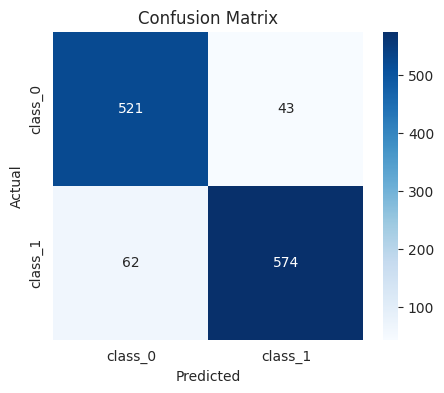

In [81]:
print("Classification report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap="Blues",
    xticklabels=['class_0', 'class_1'],
    yticklabels=['class_0', 'class_1'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Trying K-foldCV

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    shuffle=True,
    random_state=5
)

In [82]:
import numpy as np
from sklearn.model_selection import KFold

In [88]:
# params for k-fold
k = 6
kf = KFold(
    n_splits=k,
    shuffle=True,
    random_state=5
)

params = {
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'solver': ['sag', 'saga', 'newton-cholesky'],
    'max_iter': [100, 500, 750, 900, 1000]
}

n_jobs = 4

best_score = 0
best_params = None

In [89]:
for p in params['penalty']:
    for s in params['solver']:
        for m in params['max_iter']:
            fold_scores = []

            try:
                for train_idx, val_idx in kf.split(X_train):
                    X_tr, X_val_kf = X_train[train_idx], X_train[val_idx]
                    y_tr, y_val_kf = y_train[train_idx], y_train[val_idx]

                    model = LogisticRegression(
                        penalty=p,
                        solver=s,
                        max_iter=m,
                        n_jobs=n_jobs
                    )
                    model.fit(X_tr, y_tr)
                    pred = model.predict(X_val_kf)
                    fold_scores.append(accuracy_score(y_val_kf, pred))

                avg_score = np.mean(fold_scores)

                if avg_score > best_score:
                    best_score = avg_score
                    best_params = (p, s, m)

            except Exception:
                continue

print("Best parameters after K-fold CV:")
print(f"Penalty: {best_params[0]}")
print(f"Solver: {best_params[1]}")
print(f"Max_iter: {best_params[2]}")
print(f"Best CV Score: {best_score:.2f}")

# retrain on full training set
best_model = LogisticRegression(
    penalty=best_params[0],
    solver=best_params[1],
    max_iter=best_params[2],
    n_jobs=n_jobs
)
best_model.fit(X_train, y_train)

/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/home/skandan-c-y/PycharmProjects/ML_lab/.venv/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:591: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.72154e-18): result may not be accurate.
  warnings.warn(
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWa

Best parameters after K-fold CV:
Penalty: None
Solver: sag
Max_iter: 100
Best CV Score: 0.91


,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


In [90]:
y_pred = best_model.predict(X_test)

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       591
           1       0.91      0.91      0.91       609

    accuracy                           0.91      1200
   macro avg       0.91      0.91      0.91      1200
weighted avg       0.91      0.91      0.91      1200



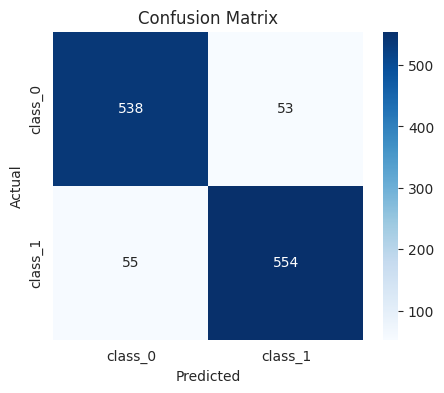

In [91]:
print("Classification report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap="Blues",
    xticklabels=['class_0', 'class_1'],
    yticklabels=['class_0', 'class_1'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()